In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import os

In [28]:
def qr(data):
    Q_n=[]
    R_n=[]
    for x_n in data:
        Q,R=np.linalg.qr(x_n.T,mode='complete')
        Q_n.append(Q)
        R_n.append(R)
    Q_n=np.hstack(Q_n) #Q_n:750 X 750*n
    return Q_n



In [29]:
def COBEC(Q_n, Z_n):
    G=np.dot(Q_n,Z_n)
    return G

In [30]:
def update(G):
    U,S,Vh=np.linalg.svd(G,full_matrices=False)
    S_bar=np.dot(U,Vh)
    return (S_bar,S)

In [12]:
channel=np.load('F:\东工OU\MEMD\channel_sd.npy')
    

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\东工OU\\MEMD\\event_%d.npy'

In [24]:
event=[]
for filepath,dirnames,filenames in os.walk(r'F:\东工OU\data\EEG\event\3'):
    for filename in filenames:
        event.append(pd.read_csv(os.path.join(filepath,filename)))
    

In [36]:
event=np.concatenate(event)[:,3]


ValueError: zero-dimensional arrays cannot be concatenated

In [37]:
np.save('event_xiang.npy',event)

fileter

In [26]:
row=event.shape[0]
data=[]
b, a  =   signal.butter( 4 , [ 2*8/128 , 2*30/128 ],  'bandpass' )
for j in range(row):
    data_array=signal.filtfilt(b,a,axis=1,x=np.array(channel[j,:,:]))
    data.append(data_array)
Z_n=np.random.randn(512*row,32) #z_n:751*n X 22

In [31]:
Q_n=qr(data)
G=COBEC(Q_n, Z_n)
S_bar,S=update(G)
Z_n-np.dot(Q_n.T,S_bar)

array([[ 0.80020437, -0.95842552,  0.30091302, ...,  0.14294388,
        -0.26684352,  0.72609983],
       [ 2.11459165, -0.91285819,  0.50815556, ...,  0.92327354,
        -0.52330376, -0.36080734],
       [-0.67945381,  0.84457763,  0.53738908, ...,  0.68608511,
        -0.89517502, -0.18109902],
       ...,
       [ 1.1056892 ,  0.27248923, -0.55464228, ...,  0.48039794,
         0.83489583, -0.03014566],
       [ 0.75042059,  0.16503772,  0.30193615, ...,  0.0025163 ,
        -0.53204682,  0.60795005],
       [ 1.67145978,  0.01477166,  0.14491819, ..., -1.98309269,
        -0.26028724, -1.87522859]])

In [32]:
Z_n=np.dot(Q_n.T,S_bar)
G=COBEC(Q_n, Z_n)
S_bar,S=update(G)
Z_n-np.dot(Q_n.T,S_bar)

array([[-1.31838984e-16, -2.01227923e-16,  9.02056208e-17, ...,
        -3.74700271e-16,  3.46944695e-17, -1.17961196e-16],
       [-6.93889390e-18, -1.66533454e-16, -1.38777878e-17, ...,
        -1.80411242e-16, -3.81639165e-17,  0.00000000e+00],
       [-8.32667268e-17, -3.46944695e-17,  1.38777878e-16, ...,
         1.38777878e-16, -1.00613962e-16, -3.64291930e-17],
       ...,
       [-1.52655666e-16, -4.85722573e-17,  2.25514052e-17, ...,
         8.32667268e-17, -3.81639165e-17,  3.46944695e-18],
       [-1.04083409e-16, -1.56125113e-16,  3.74700271e-16, ...,
        -4.16333634e-17, -6.76542156e-17, -4.51028104e-17],
       [ 1.73472348e-16, -4.85722573e-17,  3.29597460e-17, ...,
         1.94289029e-16, -6.59194921e-17, -1.11022302e-16]])

In [33]:
data_clear=[]
for x in data:
    xn_bar=np.dot(S_bar,np.dot(x,S_bar).T).T
    data_clear.append(x-xn_bar)


In [34]:
data_clear=np.array(data_clear)
np.save('data_clear_train_Xiang.npy',data_clear)

In [3]:
data_clear=np.load('data_clear_train_Xiang.npy')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10648\868583864.py:5: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


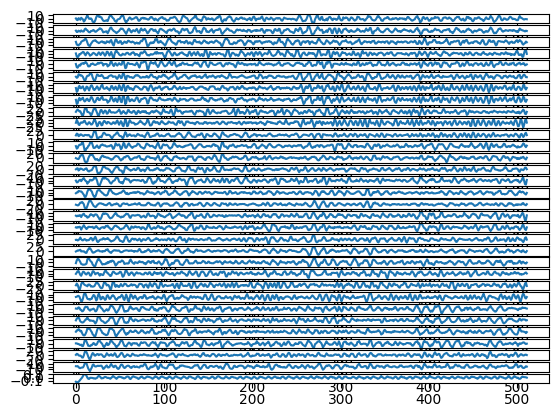

In [5]:
fog,axs=plt.subplots(32,1)
for j in range(32):
    axs[j].plot(data_clear[100,j,:])
    #axs[j].set_title('channel{}'.format(j+1))
plt.tight_layout()
plt.show() 